In [2]:
import pandas as pd
import numpy as np

In [3]:
x_train = pd.read_csv('C:/Users/Nagore/PycharmProjects/MDLAB2/Mall_Customers.csv')

x_train.drop('CustomerID', axis=1, inplace=True)
x_train.drop('Gender', axis=1, inplace=True)
x_train.drop('Spending Score (1-100)', axis=1, inplace=True)
x_train.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


Definir las variables para el clustering

In [123]:
epsilon = 3.0  # Radio de búsqueda
min_pts = 4  # Número mínimo de puntos en un cluster

In [137]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=epsilon, min_samples=min_pts,metric='euclidean')  # Ajusta los parámetros según tu necesidad
model=dbscan.fit(x_train)
cluster_labels = dbscan.fit_predict(x_train)

In [126]:
kont = np.sum(cluster_labels == -1)
print("Clasificadas como ruido: ",kont)
print("Clasificadas como no ruido: ",np.sum(cluster_labels!=-1))
#total 200

Clasificadas como ruido:  95
Clasificadas como no ruido:  105


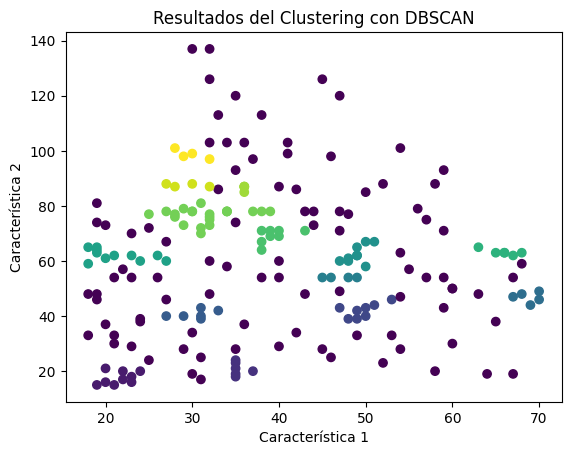

In [127]:
import matplotlib.pyplot as plt
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=cluster_labels, cmap='viridis')

# Añadir etiquetas y título al gráfico
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Resultados del Clustering con DBSCAN')

# Mostrar el gráfico
plt.show()

In [128]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(model.labels_,dtype=bool)

sample_cores[dbscan.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(model.labels_))- (1 if -1 in model.labels_ else 0)
print('No of clusters:',n_clusters)

No of clusters: 14


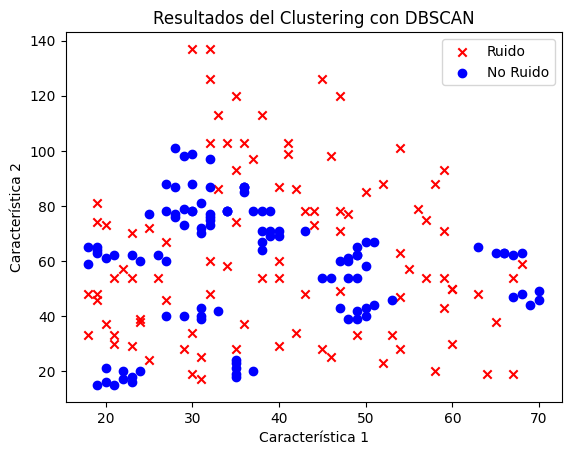

In [138]:
import matplotlib.pyplot as plt

# Asumiendo que cluster_labels contiene las etiquetas de los clusters asignados por DBSCAN
# -1 suele ser el ruido en DBSCAN, así que lo tratamos de manera especial
ruido_indices = cluster_labels == -1

# Crear una máscara para separar los puntos ruido y los no ruido
x_train_ruido = x_train[ruido_indices]
x_train_no_ruido = x_train[~ruido_indices]


# Graficar los puntos ruido en rojo y los puntos no ruido en azul
plt.scatter(x_train_ruido.iloc[:, 0], x_train_ruido.iloc[:, 1], c='red',marker='x', label='Ruido')
plt.scatter(x_train_no_ruido.iloc[:, 0], x_train_no_ruido.iloc[:, 1], c='blue',marker='o', label='No Ruido')

# Añadir etiquetas y título al gráfico
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Resultados del Clustering con DBSCAN')

# Agregar una leyenda para indicar los colores
plt.legend()

# Mostrar el gráfico
plt.show()


In [136]:
#https://www.researchgate.net/figure/Pseudocode-of-the-DBSCAN-algorithm_fig2_325059373
#https://ieeexplore.ieee.org/abstract/document/7530030?casa_token=Uk83esvD5EoAAAAA:eu8vKBPOToMEPetbIu-JnQBuFEdcpUdeq1SBqn0B2E_CGU71gmZoN4-GCSYOr37btgZMMvLO
#https://ieeexplore.ieee.org/abstract/document/8777081

def dbscan(data, epsilon, min_pts):
    clusters = []
    noise_points = set()
    visited = set()

    def get_neighbors(point):
        neighbors = []
        for p in data:
            if distance(point, p) <= epsilon:
                neighbors.append(p)
        return neighbors

    def expand_cluster(point,neighbors):
        clusterX=[point]
        for point2 in neighbors:
            if point2 not in visited:
                visited.add(point2)
                new_neighbors = get_neighbors(point2)
                if len(new_neighbors) >= min_pts:
                    neighbors.extend(new_neighbors)
            if not any([point2 in cluster for cluster in clusters]):
                if (point2 not in clusterX) and (point2 not in noise_points): #añadido por mi
                    clusterX.append(point2)
        return clusterX

    for point in data:

        if point not in visited:
            visited.add(point)
            neighbors = get_neighbors(point)
            if len(neighbors) < min_pts:
                noise_points.add(point)
            else:
                new_cluster = expand_cluster(point, neighbors)
                clusters.append(new_cluster)
    return clusters, list(noise_points)


def distance(point1, point2):
    return np.linalg.norm(np.array(point1) - np.array(point2))

x_train_tuples = [(row['Age'], row['Annual Income (k$)']) for index, row in x_train.iterrows()]

clusters, noise_points = dbscan(x_train_tuples, epsilon, min_pts)


     Age  Annual Income (k$)
0     19                  15
1     21                  15
2     20                  16
3     23                  16
4     31                  17
..   ...                 ...
195   35                 120
196   45                 126
197   32                 126
198   32                 137
199   30                 137

[200 rows x 2 columns]


Para comprobar que no hay instancias clasificadas como ruido y en clusters

In [131]:
elementos_comunes = []
for cluster in clusters:
    for elemento in cluster:
        if elemento  in noise_points:
            elementos_comunes.append(elemento)


print("Elementos comunes entre clusters y ruido:")
print(elementos_comunes)

Elementos comunes entre clusters y ruido:
[]


In [132]:
print("Clasificadas como ruido: ",len(noise_points))
kont=0
for i in range (0,len(clusters)):
    kont=kont+len(clusters[i])
print("Clasificadas como clusters: ",kont)

#es correcto pq en ruido hay 110 (1 elemento repetido (60,50)) y en clusters 90 (7 elementos repetidos (49,62)x2, (66,63)x2, (34,78)x3, (30,78)x2, (36,87)x3 )

Clasificadas como ruido:  109
Clasificadas como clusters:  83


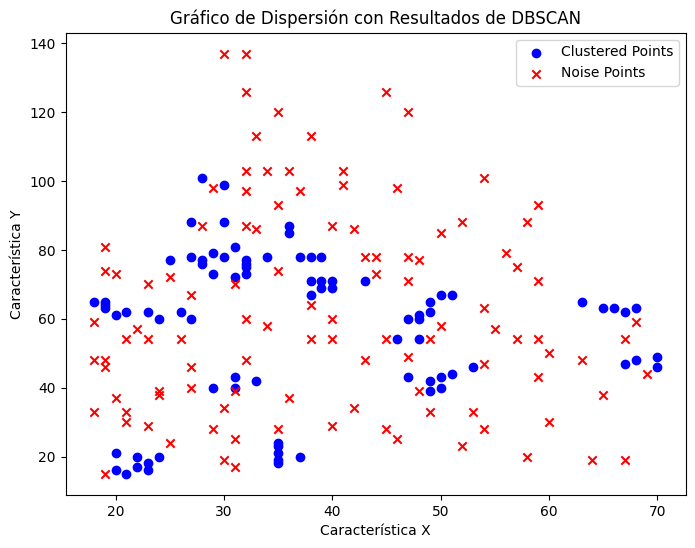

In [133]:
import matplotlib.pyplot as plt
import numpy as np

# Convertir las listas de clusters en un formato que se pueda trazar
clustered_points = [point for cluster in clusters for point in cluster]
noise_points = list(noise_points)

# Convertir los clusters y los puntos de ruido en matrices numpy para facilitar la manipulación
clustered_points = np.array(clustered_points)
noise_points = np.array(noise_points)

# Crear un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(clustered_points[:, 0], clustered_points[:, 1], c='b', marker='o', label='Clustered Points')
plt.scatter(noise_points[:, 0], noise_points[:, 1], c='r', marker='x', label='Noise Points')

# Etiquetas y título del gráfico
plt.xlabel('Característica X')
plt.ylabel('Característica Y')
plt.title('Gráfico de Dispersión con Resultados de DBSCAN')

# Leyenda para los puntos
plt.legend()

# Mostrar el gráfico
plt.show()


Que instancias no coinciden en los dos metodos

In [169]:
#DB SCAN
A=[(19, 15), (21, 15), (20, 16), (23, 16), (22, 17), (35, 18), (23, 18), (35, 19), (24, 20), (37, 20), (22, 20), (35, 21), (20, 21), (35, 23), (35, 24), (48, 39), (31, 39), (49, 39), (50, 40), (27, 40), (29, 40), (31, 40), (49, 42), (33, 42), (31, 43), (50, 43), (47, 43), (51, 44), (69, 44), (53, 46), (70, 46), (67, 47), (68, 48), (70, 49), (45, 54), (49, 54), (46, 54), (48, 54), (50, 58), (18, 59), (48, 60), (24, 60), (47, 60), (27, 60), (48, 61), (20, 61), (23, 62), (49, 62), (67, 62), (26, 62), (49, 62), (21, 62), (66, 63), (68, 63), (66, 63), (65, 63), (19, 63), (38, 64), (19, 64), (18, 65), (19, 65), (63, 65), (49, 65), (51, 67), (50, 67), (38, 67), (40, 69), (39, 69), (31, 70), (43, 71), (40, 71), (38, 71), (39, 71), (31, 72), (29, 73), (32, 73), (32, 75), (28, 76), (32, 76), (25, 77), (28, 77), (32, 77), (34, 78), (34, 78), (39, 78), (38, 78), (27, 78), (37, 78), (30, 78), (34, 78), (30, 78), (29, 79), (31, 81), (36, 85), (36, 87), (32, 87), (28, 87), (36, 87), (36, 87), (30, 88), (27, 88), (32, 97), (29, 98), (30, 99), (28, 101)]
#NUESTRO
B=[(21, 15), (20, 16), (23, 16), (22, 17), (23, 18), (22, 20), (24, 20), (20, 21), (35, 18), (35, 19), (37, 20), (35, 21), (35, 23), (35, 24), (49, 39), (50, 40), (49, 42), (50, 43), (47, 43), (51, 44), (53, 46), (29, 40), (31, 40), (33, 42), (31, 43), (70, 46), (68, 48), (70, 49), (67, 47), (46, 54), (48, 54), (48, 60), (47, 60), (48, 61), (49, 62), (49, 65), (51, 67), (50, 67), (24, 60), (27, 60), (23, 62), (26, 62), (21, 62), (20, 61), (19, 63), (19, 64), (18, 65), (19, 65), (67, 62), (66, 63), (68, 63), (65, 63), (63, 65), (38, 67), (40, 69), (39, 69), (40, 71), (38, 71), (39, 71), (43, 71), (31, 72), (29, 73), (32, 73), (32, 75), (32, 76), (32, 77), (34, 78), (30, 78), (37, 78), (28, 76), (28, 77), (27, 78), (29, 79), (39, 78), (38, 78), (25, 77), (31, 81), (36, 85), (36, 87), (30, 88), (27, 88), (30, 99), (28, 101)]
print(len(A))
print(len(B))
#las 7 que faltan es pq hay repetidas

for a in A:
    if a not in B:
        print(a)
# 15 de mas como ruido

105
83
(19, 15)
(48, 39)
(31, 39)
(27, 40)
(69, 44)
(45, 54)
(49, 54)
(50, 58)
(18, 59)
(38, 64)
(31, 70)
(32, 87)
(28, 87)
(32, 97)
(29, 98)
